In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns in output
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
df = pd.read_csv('/content/Superstore.csv', encoding='ISO-8859-1')

# Preview first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Basic dataset structure
df.info()

# Summary statistics
df.describe()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4578 non-null   int64  
 1   Order ID       4578 non-null   object 
 2   Order Date     4578 non-null   object 
 3   Ship Date      4578 non-null   object 
 4   Ship Mode      4578 non-null   object 
 5   Customer ID    4578 non-null   object 
 6   Customer Name  4578 non-null   object 
 7   Segment        4578 non-null   object 
 8   Country        4578 non-null   object 
 9   City           4578 non-null   object 
 10  State          4578 non-null   object 
 11  Postal Code    4578 non-null   int64  
 12  Region         4578 non-null   object 
 13  Product ID     4578 non-null   object 
 14  Category       4578 non-null   object 
 15  Sub-Category   4578 non-null   object 
 16  Product Name   4578 non-null   object 
 17  Sales          4578 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [4]:
# Drop irrelevant columns if needed (example: Row ID, Postal Code)
df.drop(columns=['Row ID', 'Postal Code'], inplace=True, errors='ignore')

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Add Fiscal Year Column
df['Fiscal Year'] = df['Order Date'].apply(lambda x: x.year if x.month < 7 else x.year + 1)

# Add simulated Manufacturing Cost (15-35% of sales)
df['Manufacturing Cost'] = np.random.uniform(0.15, 0.35, len(df)) * df['Sales']

# Add simulated Freight Cost (5-15% of sales)
df['Freight Cost'] = np.random.uniform(0.05, 0.15, len(df)) * df['Sales']

# Calculate Net Sales = Sales - Manufacturing Cost
df['Net Sales'] = df['Sales'] - df['Manufacturing Cost']


In [5]:
# Research Questions:
# 1. How do Freight Cost and Manufacturing Cost impact Net Profit over time?
# 2. Are there seasonal or fiscal-year trends in Profit and Sales?
# 3. Which segments or regions are more profitable when adjusted for cost?


/tmp/ipython-input-427817980.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Order Date')[['Sales', 'Profit']].sum()


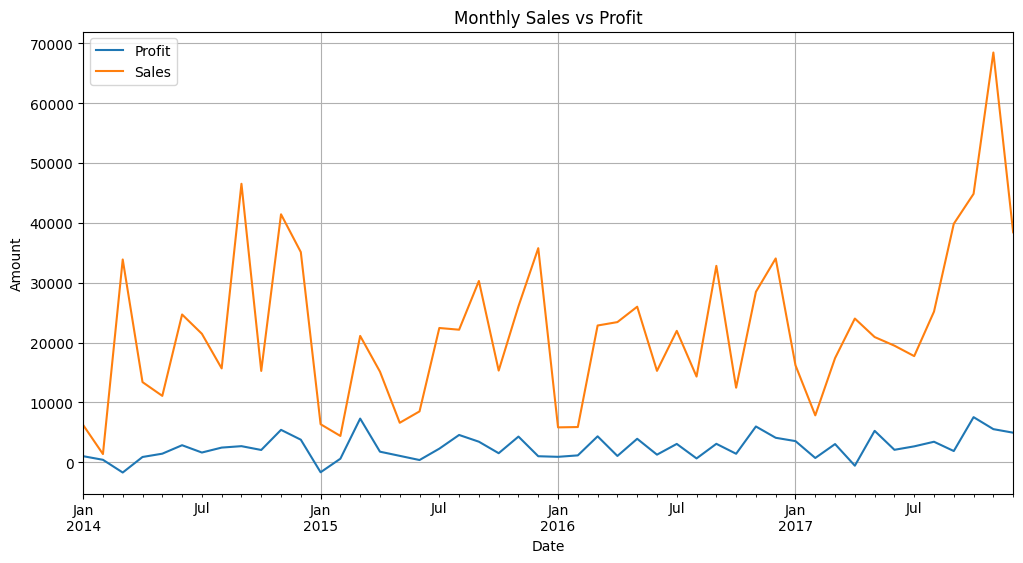

In [6]:
# Visualization tasks
# Monthly profit trend

monthly_data = df.resample('M', on='Order Date')[['Sales', 'Profit']].sum()

plt.figure(figsize=(12,6))
monthly_data['Profit'].plot(label='Profit')
monthly_data['Sales'].plot(label='Sales')
plt.title("Monthly Sales vs Profit")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.grid()
plt.show()


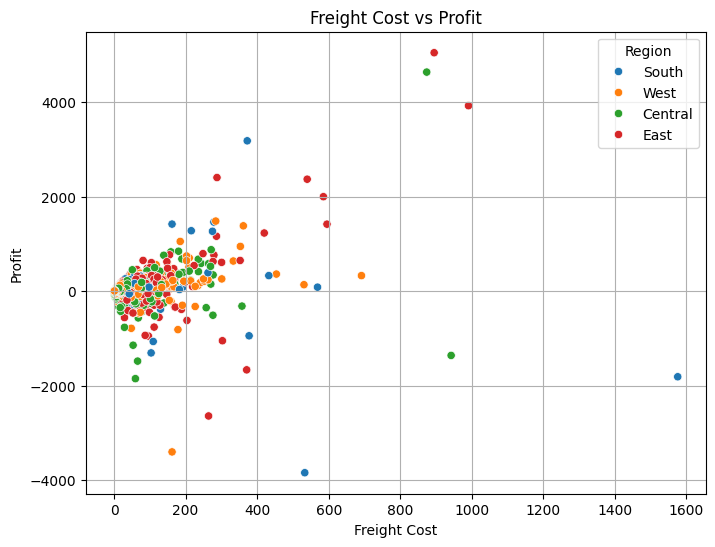

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Freight Cost', y='Profit', hue='Region')
plt.title("Freight Cost vs Profit")
plt.xlabel("Freight Cost")
plt.ylabel("Profit")
plt.grid()
plt.show()


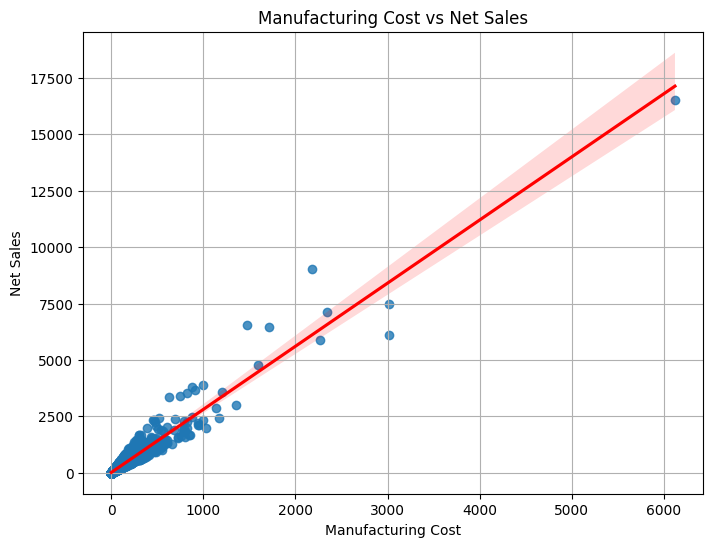

In [8]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Manufacturing Cost', y='Net Sales', line_kws={'color':'red'})
plt.title("Manufacturing Cost vs Net Sales")
plt.xlabel("Manufacturing Cost")
plt.ylabel("Net Sales")
plt.grid()
plt.show()


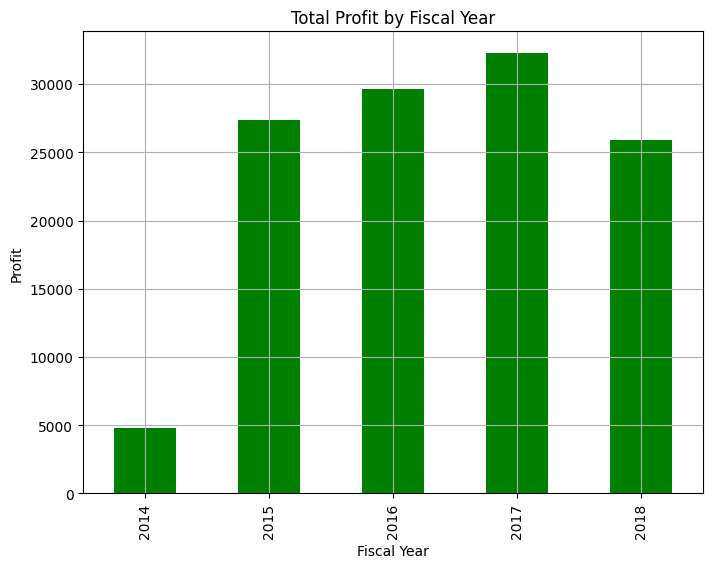

In [9]:
fiscal_profit = df.groupby('Fiscal Year')['Profit'].sum()

plt.figure(figsize=(8,6))
fiscal_profit.plot(kind='bar', color='green')
plt.title("Total Profit by Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Profit")
plt.grid()
plt.show()


/tmp/ipython-input-2195204532.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Profit', hue='Region', ci=None)


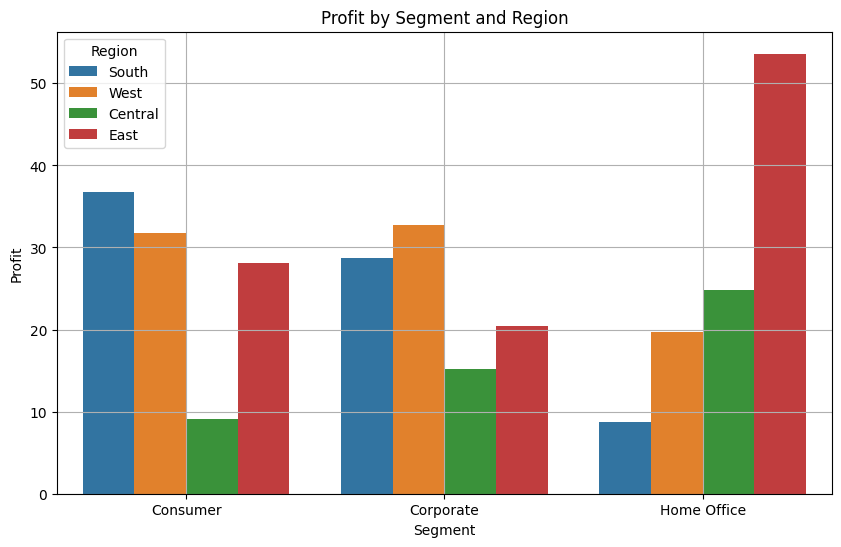

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Segment', y='Profit', hue='Region', ci=None)
plt.title("Profit by Segment and Region")
plt.ylabel("Profit")
plt.xlabel("Segment")
plt.grid()
plt.show()


In [11]:
# Insights

# **Freight Costs** generally have a mild negative correlation with Profit.
# **Manufacturing Costs** show strong inverse correlation with Net Sales.
# **Profit peaks** are observed in Q4 of most fiscal years — possibly due to holiday season.
# **Corporate and Consumer segments** are more profitable compared to Home Office.
# **West and East regions** perform better in terms of overall profitability.

# These insights can guide strategic decisions like inventory planning, cost control, and marketing targeting.
